# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [1]:
# Install the required libraries
!pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.3 MB 4.2 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/13.3 MB 2.8 MB/s eta 0:00:05
   ---- ----------------------------------- 1.6/13.3 MB 3.0 MB/s eta 0:00:04
   ----- ---------------------------------- 1.8/13.3 MB 2.9 MB/s eta 0:00:04
   ------ --------------------------------- 2.1/13.3 MB 2.2 MB/s eta 0:00:06
   ------ --------------------------------- 2.1/13.3 MB 2.2 MB/s eta 0:00:06
   ------ --------------------------------- 2.1/13.3 MB 2.2 MB/s eta 0:00:06
   ------ --------------------------------- 2.1/13.3 MB 2.2 MB/s eta 0:00:06
   ------- -------------------------------- 2.6/13.3 MB 1.3 MB/s eta 0:00:08
   -------- ------------------------------- 2.9/13.3 MB 1.4 MB/s eta 0:00:08
   ---------- ----------------------------- 3.4/13.3 MB 1.5 MB/s eta 0:00:07
   ----------- ---------------------------- 3.9/13.3 MB 1.6 MB/s eta 0:00:06
   ---

In [2]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [3]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

C:\Users\mark_\AppData\Local\Temp\ipykernel_1136\1669825240.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [4]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


<Axes: xlabel='Date'>

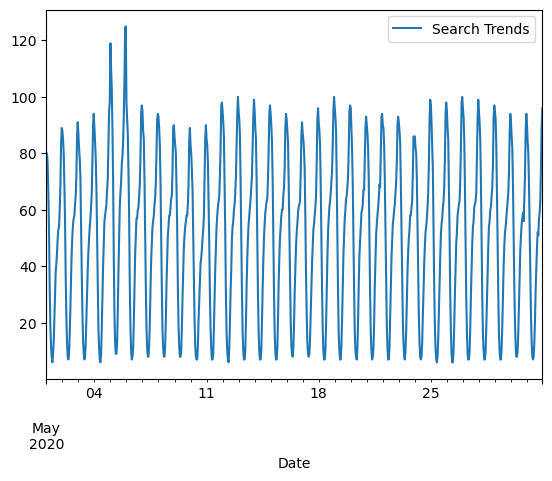

In [5]:
# Slice the DataFrame to just the month of May 2020
sliced_df = df_mercado_trends.loc['2020-05']

# Plot to visualize the data for May 2020
sliced_df.plot()

#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [6]:
# Calculate the sum of the total search traffic for May 2020
number_of_searches = sliced_df["Search Trends"].sum()
display("Total number of searches (using the explicit sum of the column 'Search Trends' in May of 2020 is " + str(number_of_searches))

# View the traffic_may_2020 value
display(sliced_df.sum())

"Total number of searches (using the explicit sum of the column 'Search Trends' in May of 2020 is 38181"

Search Trends    38181
dtype: int64

In [7]:
# Calcluate the monhtly median search traffic across all months
monthly_median = df_mercado_trends.groupby([pd.Grouper(freq='ME')]).median()

# Group the DataFrame by index year and then index month, chain the sum and then the median functions
grouped = df_mercado_trends.groupby([pd.Grouper(freq='YE'), pd.Grouper(freq='ME')]).sum()
result = grouped.groupby(level=0).median()
display("Group the DataFrame by index year and then index month")
display(grouped)
display("Chain the sum and then the median functions")
display(result)

# View the median_monthly_traffic value
display("Monhtly median search traffic across all months")
display(monthly_median)

'Group the DataFrame by index year and then index month'

Search Trends
Date       Date                     
2016-12-31 2016-06-30          33196
           2016-07-31          33898
           2016-08-31          34459
           2016-09-30          32376
           2016-10-31          32334
           2016-11-30          33793
           2016-12-31          33789
2017-12-31 2017-01-31          32984
           2017-02-28          31901
           2017-03-31          35363
           2017-04-30          32522
           2017-05-31          33216
           2017-06-30          34211
           2017-07-31          34988
           2017-08-31          36113
           2017-09-30          33693
           2017-10-31          32842
           2017-11-30          35144
           2017-12-31          35420
2018-12-31 2018-01-31          37347
           2018-02-28          33748
           2018-03-31          36051
           2018-04-30          35283
           2018-05-31          35309
           2018-06-30          34115
           2018-07-31          35927
           2018-08-31          37012
           2018-09-30          34037
           2018-10-31          35879
           2018-11-30          34686
           2018-12-31          35245
2019-12-31 2019-01-31          38505
           2019-02-28          34129
           2019-03-31          37331
           2019-04-30          35505
           2019-05-31          34983
           2019-06-30          36120
           2019-07-31          37089
           2019-08-31          37540
           2019-09-30          35201
           2019-10-31          37212
           2019-11-30          36280
           2019-12-31          37825
2020-12-31 2020-01-31          39177
           2020-02-29          30838
           2020-03-31          24805
           2020-04-30          35229
           2020-05-31          38181
           2020-06-30          35758
           2020-07-31          35620
           2020-08-31          33530
           2020-09-30           8126

'Chain the sum and then the median functions'

,Search Trends
Date,
2016-12-31,33789.0
2017-12-31,33952.0
2018-12-31,35296.0
2019-12-31,36684.5
2020-12-31,35229.0


'Monhtly median search traffic across all months'

,Search Trends
Date,
2016-06-30,50.0
2016-07-31,48.5
2016-08-31,50.0
2016-09-30,47.0
2016-10-31,45.0
2016-11-30,51.0
2016-12-31,48.0
2017-01-31,47.0
2017-02-28,51.0


In [8]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
df_may_2020 = df_mercado_trends.loc['2020-05-01':'2020-05-31']
traffic_may_2020 = df_may_2020['Search Trends'].sum()
median_monthly_traffic = df_mercado_trends.resample('ME').sum()['Search Trends'].median()
display(traffic_may_2020/median_monthly_traffic)

1.0855355746677091

##### Answer the following question:

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:** Mark Wireman's response: With the ratio of the May 2020 traffic to the overall monthly traffic at a value greater than 1, the traffic did show an increase that aligned with the release of the financial results.

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

'Group the hourly search data to plot the average traffic by the day of week'

,Search Trends
Date,
0,90.0
1,86.0
2,77.0
3,62.0
4,43.0
5,26.0
6,14.0
7,8.0
8,6.0


<Axes: title={'center': 'Grouping of Hourly by Day of the Week'}, xlabel='Date'>

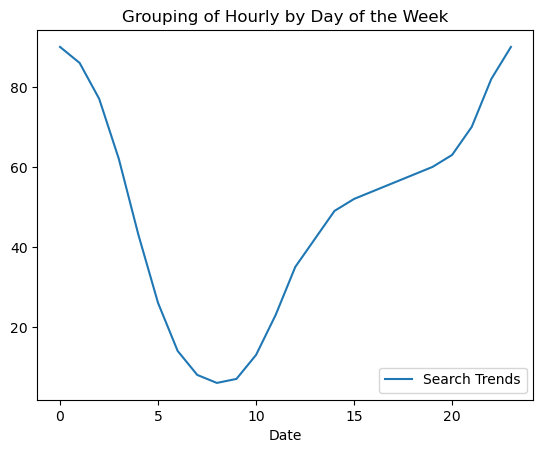

In [9]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.hour`
df_mercado_trends.index = pd.to_datetime(df_mercado_trends.index)
grouped = df_mercado_trends.groupby([df_mercado_trends.index.hour]).median()

display("Group the hourly search data to plot the average traffic by the day of week")
display(grouped)
grouped.plot(title="Grouping of Hourly by Day of the Week")

#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

,Search Trends,Day of the Week
Day of the Week,,
Monday,55.0,Monday
Tuesday,54.0,Tuesday
Wednesday,54.0,Wednesday
Thursday,54.0,Thursday
Friday,53.0,Friday
Saturday,48.0,Saturday
Sunday,44.0,Sunday


<Axes: xlabel='Day of the Week'>

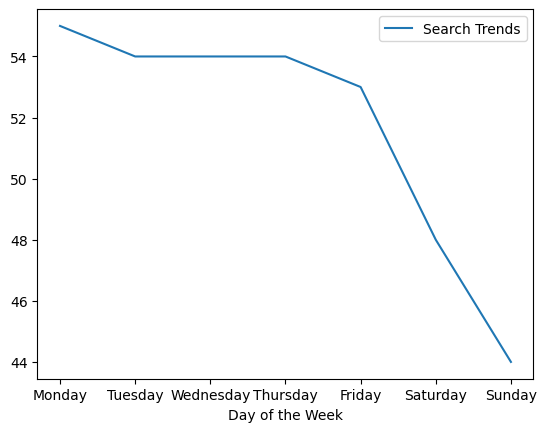

In [10]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.isocalendar().day`.
day_map = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}

grouped_day_of_week = df_mercado_trends.groupby(df_mercado_trends.index.isocalendar().day).median()
grouped_day_of_week['Day of the Week'] = grouped_day_of_week.index.map(day_map)
grouped_day_of_week.index = grouped_day_of_week['Day of the Week']
display(grouped_day_of_week)
grouped_day_of_week.plot()

#### Step 3: Group the hourly search data to plot the average traffic by the week of the year.

<Axes: xlabel='year'>

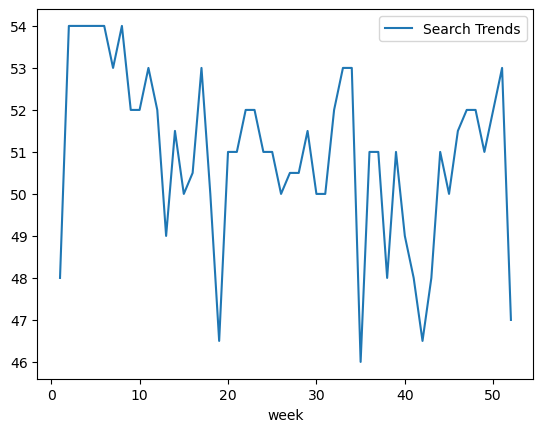

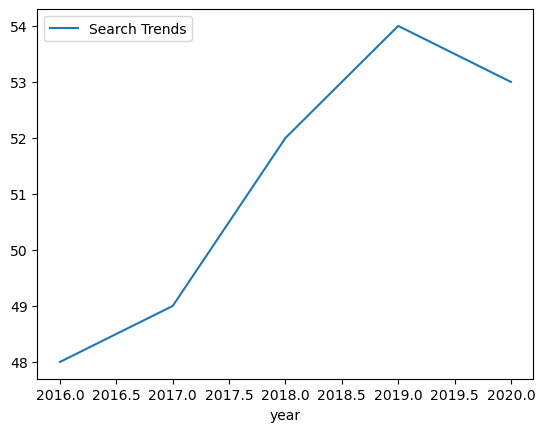

In [11]:
# Group the hourly search data to plot the average traffic by the week of the year using `df.index.isocalendar().week`.
grouped_week_of_year = df_mercado_trends.groupby([df_mercado_trends.index.isocalendar().week]).median()

grouped_week_of_year.plot()
df_mercado_trends.groupby([df_mercado_trends.index.isocalendar().year]).median().plot()

##### Answer the following question:

**Question:** Are there any time based trends that you can see in the data?

**Answer:** Mark Wireman response: In working backgrounds, the trend showed a constant upward search result from 2016 to mid-2019. Then, from mid-2019 into early 2020 the trend took a constant decline in search results. Further research is necessary to identify the reason for the decline after the peak in mid-2019. 

When focusing on the aggregation of weekly trends during the period, the first quarter of each year has the greatest search results and then levels off with a pattern of an increase in search results at the end of quarters two through four. This can be indicative of investors evaluating positions and making adjustments accordingly.

For the day of the week and hour search trends, the findings coorelate with trading days (Monday through Friday) and trading hours (9:30am to 4pm EST), with pre-market search results peaking at the start of the week (Monday) and the opening of the markets (9:30am). 



## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [12]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


<Axes: xlabel='date'>

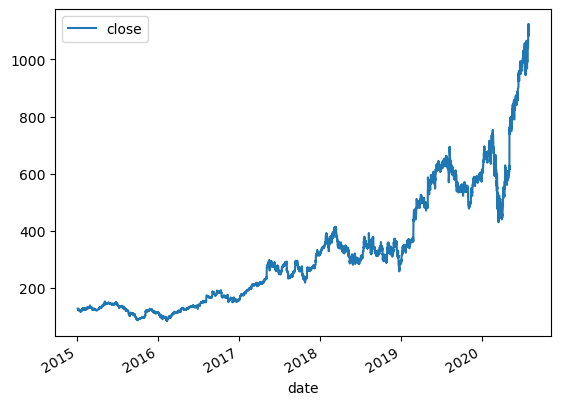

In [13]:
# Visualize the closing price of the df_mercado_stock DataFrame
df_mercado_stock.plot()

In [14]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data
df_mercado_combined = pd.concat([df_mercado_stock,df_mercado_trends], axis=1).dropna(thresh=2)

# View the first and last five rows of the DataFrame
display(df_mercado_combined.head(5))
display(df_mercado_combined.tail(5))

,close,Search Trends
2016-06-01 09:00:00,135.16,6.0
2016-06-01 10:00:00,136.63,12.0
2016-06-01 11:00:00,136.56,22.0
2016-06-01 12:00:00,136.42,33.0
2016-06-01 13:00:00,136.10,40.0


,close,Search Trends
2020-07-31 11:00:00,1105.780,20.0
2020-07-31 12:00:00,1087.925,32.0
2020-07-31 13:00:00,1095.800,41.0
2020-07-31 14:00:00,1110.650,47.0
2020-07-31 15:00:00,1122.510,53.0


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?
Mark Wireman's response: The data for the first half of 2020 does appear to support the narrative. A visual representation will provide more context to affirmatively support or not support the narrative.

In [15]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06)
df_first_half_2020 = df_mercado_combined.loc['2020-01-01':'2020-06-30']

# View the first and last five rows of first_half_2020 DataFrame
display(df_first_half_2020.head(5))
display(df_first_half_2020.tail(5))



,close,Search Trends
2020-01-02 09:00:00,601.085,9.0
2020-01-02 10:00:00,601.290,14.0
2020-01-02 11:00:00,615.410,25.0
2020-01-02 12:00:00,611.400,37.0
2020-01-02 13:00:00,611.830,50.0


,close,Search Trends
2020-06-30 11:00:00,976.17,17.0
2020-06-30 12:00:00,977.50,27.0
2020-06-30 13:00:00,973.23,37.0
2020-06-30 14:00:00,976.50,45.0
2020-06-30 15:00:00,984.93,51.0


array([<Axes: >, <Axes: >], dtype=object)

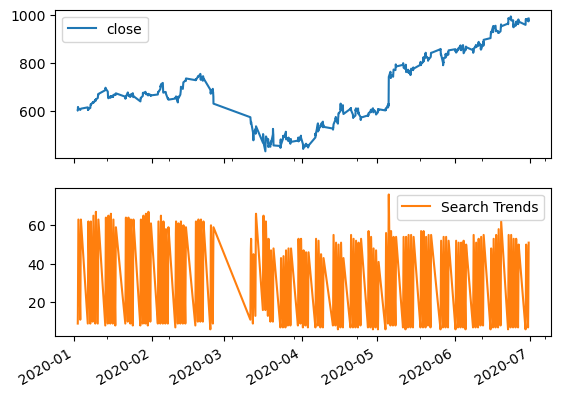

In [16]:
# Visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `plot(subplots=True)`
df_first_half_2020.plot(subplots=True)

##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:** Upon further evaluation of the charts, the data does support the narrative.

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [17]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour
df_mercado_combined["Lagged Search Trends"] = df_mercado_combined["Search Trends"].shift(1)
display(df_mercado_combined.head())

,close,Search Trends,Lagged Search Trends
2016-06-01 09:00:00,135.16,6.0,NaN
2016-06-01 10:00:00,136.63,12.0,6.0
2016-06-01 11:00:00,136.56,22.0,12.0
2016-06-01 12:00:00,136.42,33.0,22.0
2016-06-01 13:00:00,136.10,40.0,33.0


In [18]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
df_mercado_combined['Hourly Stock Return'] = df_mercado_combined['close'].pct_change()
df_mercado_combined['Stock Volatility'] = df_mercado_combined['Hourly Stock Return'].rolling(window=4).std()
display(df_mercado_combined.head())
display(df_mercado_combined.tail())

,close,Search Trends,Lagged Search Trends,Hourly Stock Return,Stock Volatility
2016-06-01 09:00:00,135.16,6.0,NaN,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,6.0,0.010876,NaN
2016-06-01 11:00:00,136.56,22.0,12.0,-0.000512,NaN
2016-06-01 12:00:00,136.42,33.0,22.0,-0.001025,NaN
2016-06-01 13:00:00,136.10,40.0,33.0,-0.002346,0.006134


,close,Search Trends,Lagged Search Trends,Hourly Stock Return,Stock Volatility
2020-07-31 11:00:00,1105.780,20.0,11.0,0.006380,0.012837
2020-07-31 12:00:00,1087.925,32.0,20.0,-0.016147,0.013549
2020-07-31 13:00:00,1095.800,41.0,32.0,0.007239,0.013295
2020-07-31 14:00:00,1110.650,47.0,41.0,0.013552,0.013001
2020-07-31 15:00:00,1122.510,53.0,47.0,0.010678,0.013566


<Axes: >

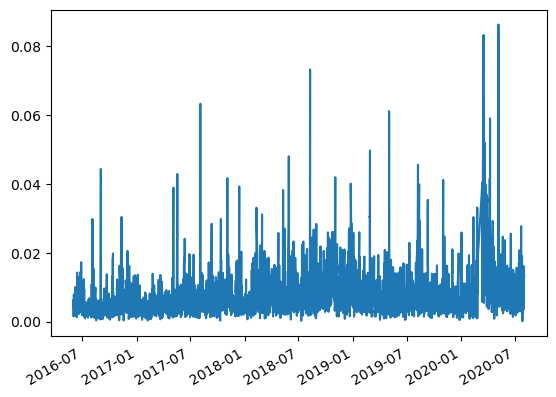

In [19]:
# Visualize the stock volatility
df_mercado_combined['Stock Volatility'].plot()


**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [20]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price
# SEE ABOVE: In order to plot the volatility the percentage was required and then the std volatility.
# The homework assignment appears to be out of order.

In [21]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame
display(df_mercado_combined.head())
display(df_mercado_combined.tail())

,close,Search Trends,Lagged Search Trends,Hourly Stock Return,Stock Volatility
2016-06-01 09:00:00,135.16,6.0,NaN,NaN,NaN
2016-06-01 10:00:00,136.63,12.0,6.0,0.010876,NaN
2016-06-01 11:00:00,136.56,22.0,12.0,-0.000512,NaN
2016-06-01 12:00:00,136.42,33.0,22.0,-0.001025,NaN
2016-06-01 13:00:00,136.10,40.0,33.0,-0.002346,0.006134


,close,Search Trends,Lagged Search Trends,Hourly Stock Return,Stock Volatility
2020-07-31 11:00:00,1105.780,20.0,11.0,0.006380,0.012837
2020-07-31 12:00:00,1087.925,32.0,20.0,-0.016147,0.013549
2020-07-31 13:00:00,1095.800,41.0,32.0,0.007239,0.013295
2020-07-31 14:00:00,1110.650,47.0,41.0,0.013552,0.013001
2020-07-31 15:00:00,1122.510,53.0,47.0,0.010678,0.013566


#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [22]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
df_mercado_combined[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()

,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.148938,0.061424
Lagged Search Trends,-0.148938,1.000000,0.017929
Hourly Stock Return,0.061424,0.017929,1.000000


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:** Mark Wireman's response: There does not appear to be any correlation between the logged search trends and the volatility of a stock. All of the correlation values are well below the .6 value. The results do align with anticipated results that search trends do not influence or have an impact on the stock's volatility.

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [37]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
prophet_df = df_mercado_trends.reset_index()

# Label the columns ds and y so that the syntax is recognized by Prophet
prophet_df.columns = ['ds','y']

# Drop an NaN values from the prophet_df DataFrame
prophet_df.dropna()

# View the first and last five rows of the mercado_prophet_df DataFrame
display(prophet_df.head())
display(prophet_df.tail())

,ds,y
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38


,ds,y
37101,2020-09-07 20:00:00,71
37102,2020-09-07 21:00:00,83
37103,2020-09-07 22:00:00,96
37104,2020-09-07 23:00:00,97
37105,2020-09-08 00:00:00,96


In [41]:
# Call the Prophet function, store as an object
m = Prophet()
m

In [42]:
# Fit the time-series model.
m.fit(prophet_df)

22:58:45 - cmdstanpy - INFO - Chain [1] start processing
22:59:15 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future_mercado_trends = m.make_future_dataframe(periods=1000, freq='h')

# View the last five rows of the future_mercado_trends DataFrame
future_mercado_trends.tail()

,ds
38101,2020-10-19 12:00:00
38102,2020-10-19 13:00:00
38103,2020-10-19 14:00:00
38104,2020-10-19 15:00:00
38105,2020-10-19 16:00:00


In [44]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast = m.predict(future_mercado_trends)

# Display the first five rows of the forecast_mercado_trends DataFrame
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.352625,81.196584,98.180445,44.352625,44.352625,45.307367,45.307367,45.307367,41.452720,...,1.860390,1.860390,1.860390,1.994257,1.994257,1.994257,0.0,0.0,0.0,89.659992
1,2016-06-01 01:00:00,44.353557,77.539019,94.679309,44.353557,44.353557,41.753097,41.753097,41.753097,37.943514,...,1.810288,1.810288,1.810288,1.999294,1.999294,1.999294,0.0,0.0,0.0,86.106654
2,2016-06-01 02:00:00,44.354489,67.506436,84.102289,44.354489,44.354489,31.429548,31.429548,31.429548,27.656552,...,1.768695,1.768695,1.768695,2.004301,2.004301,2.004301,0.0,0.0,0.0,75.784037
3,2016-06-01 03:00:00,44.355421,52.159922,68.950041,44.355421,44.355421,16.162280,16.162280,16.162280,12.417302,...,1.735704,1.735704,1.735704,2.009275,2.009275,2.009275,0.0,0.0,0.0,60.517701
4,2016-06-01 04:00:00,44.356353,34.523558,52.500611,44.356353,44.356353,-0.952639,-0.952639,-0.952639,-4.678127,...,1.711270,1.711270,1.711270,2.014218,2.014218,2.014218,0.0,0.0,0.0,43.403713


#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

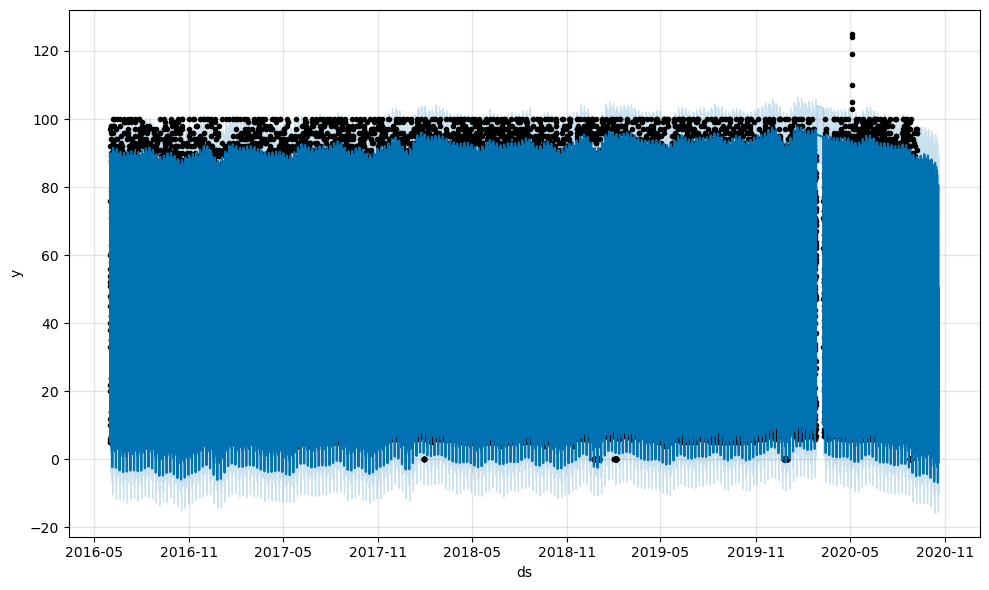

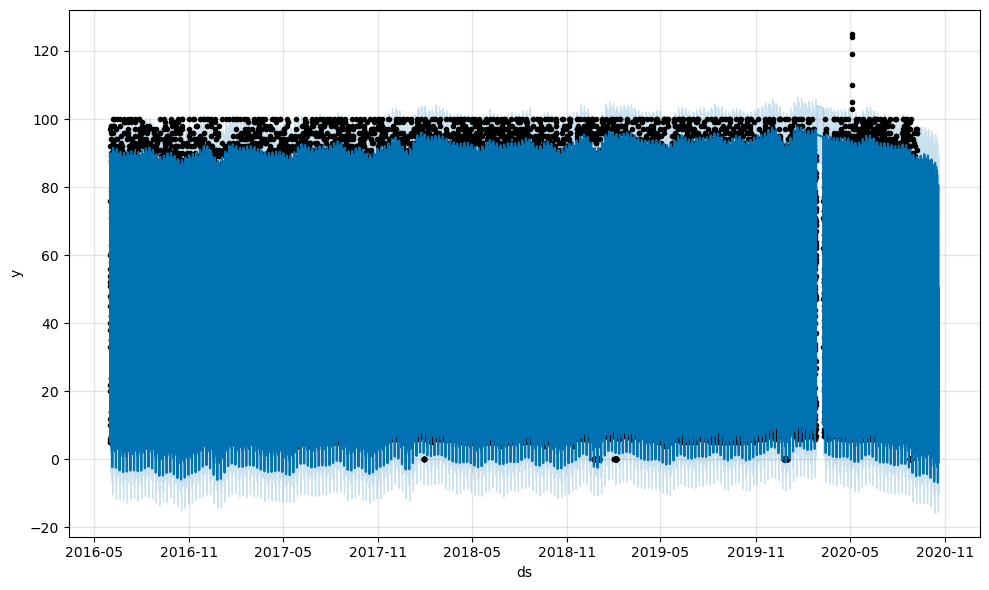

In [45]:
# Plot the Prophet predictions for the Mercado trends data
m.plot(forecast)

##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:** Mark Wireman's response: The near-term forecast for the popularity of MercadoLibre is not accurate due to the saturation of the data used for training. The forecast is nearly identical to the training set.


#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [62]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast_mercado_trends = forecast.copy()
forecast_mercado_trends.set_index('ds', inplace=True)
# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']].head()


,yhat,yhat_lower,yhat_upper
ds,,,
2016-06-01 00:00:00,89.659992,81.196584,98.180445
2016-06-01 01:00:00,86.106654,77.539019,94.679309
2016-06-01 02:00:00,75.784037,67.506436,84.102289
2016-06-01 03:00:00,60.517701,52.159922,68.950041
2016-06-01 04:00:00,43.403713,34.523558,52.500611


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

<Axes: xlabel='ds'>

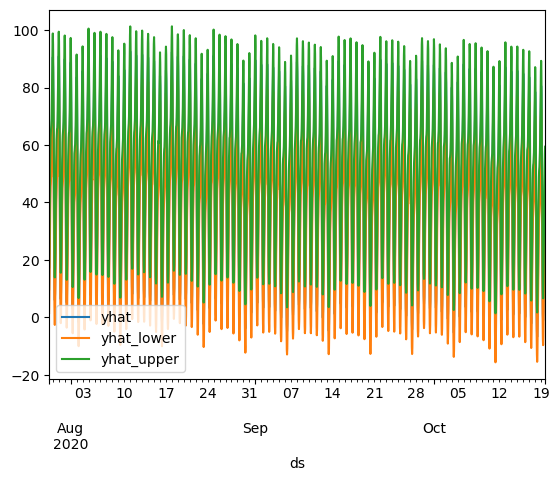

In [63]:
# From the forecast_mercado_trends DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours
forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-2000:,:].plot()

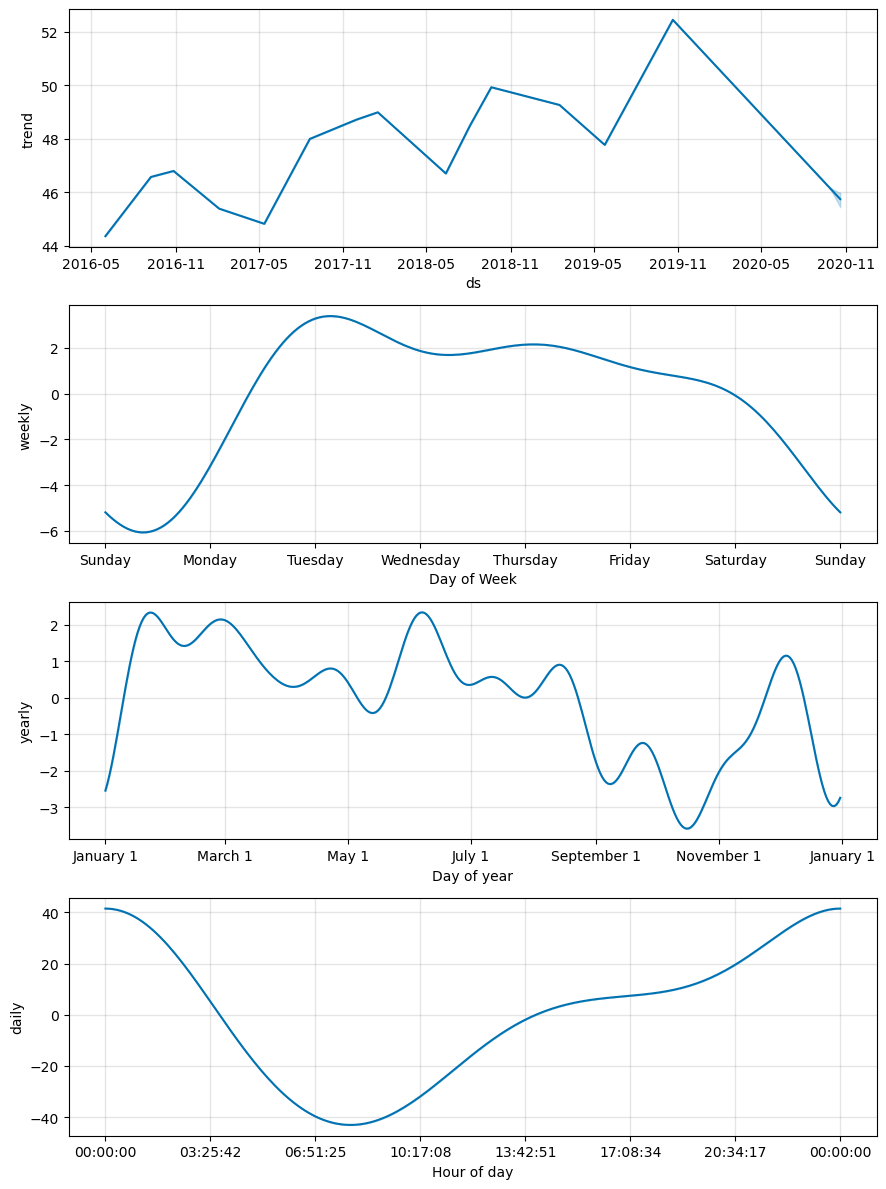

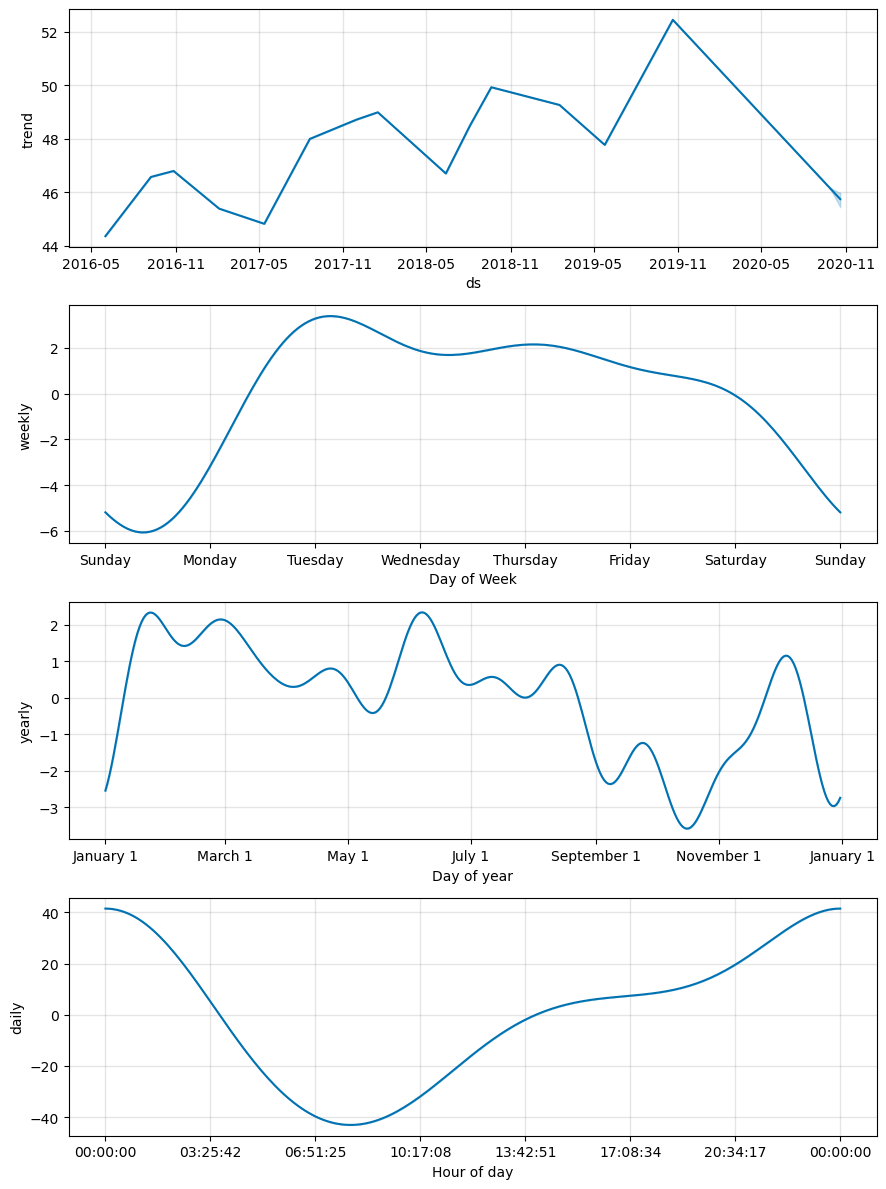

In [67]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast_mercado_trends = forecast_mercado_trends.reset_index()

# Use the plot_components function to visualize the forecast results
# for the forecast_mercado_trends DataFrame
m.plot_components(forecast_mercado_trends)

##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:**

**Question:** Which day of week gets the most search traffic?
   
**Answer:**

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:**
